# Attrition Analysis

## Overview
a. Importing Data

b. Data Treatment

c. Univariate Analysis

d. Checking for outliers and distributions

e. Performing Non Parametric Tests

f. Performing Parametric Test

g. Correlation Analysis

h. Plots to visualise the data


# Importing data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

df = pd.read_csv('C:/Users/HP/general_data.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


# Data Treatment

## Checking for null values

In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Finding out the mean and filling the null values

### Check mean to fill null values

In [4]:
df[['NumCompaniesWorked', 'TotalWorkingYears']].mean()

NumCompaniesWorked     2.694830
TotalWorkingYears     11.279936
dtype: float64

## Filling up null values with their mean

In [5]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2.69) 
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28)

### Checking if it is filled

In [6]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Encoding the alphabetical data

## Encoding categorical/string values

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Department'] = le.fit_transform(df['Department'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['JobRole'] = le.fit_transform(df['JobRole'])

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,Y,11,8,0,1.00,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,Y,23,8,1,6.00,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,Y,15,8,3,5.00,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,Y,11,8,3,13.00,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,Y,12,8,2,9.00,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,Y,17,8,1,10.00,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,Y,15,8,0,10.00,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,Y,20,8,0,5.00,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,Y,14,8,1,10.00,2,9,7,8


## Making a new dataframe with the columns to work on

In [9]:
df1 = df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

## Making variables to store Attrition values

In [10]:
df_y = df1[df1['Attrition']==1]
df_n = df1[df1['Attrition']==0]
cols = list(df1.columns)

# Univariate Analysis

## Obtaining basic statistics

In [11]:
df[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','Gender', 'MaritalStatus',
       'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked']].describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,0.600000,1.097279,2.063946,4.458503,65029.312925,2.694810
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.489954,0.729955,1.106689,2.461263,47068.888559,2.493497
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10090.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,29110.000000,1.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.000000,1.000000,2.000000,5.000000,49190.000000,2.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.000000,2.000000,3.000000,7.000000,83800.000000,4.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.000000,2.000000,5.000000,8.000000,199990.000000,9.000000


In [12]:
df[['PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()

,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,15.209524,11.279937,2.799320,7.008163,2.187755,4.123129
std,3.659108,7.774275,1.288978,6.125135,3.221699,3.567327
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Mode

## Finding out the mode

In [13]:
df1.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,2,1,2,3,1,1,1,1,7,23420,1.0,11,10.0,2,5,0,2


# Median

## Finding out the median

In [14]:
df_med = pd.DataFrame(df1.median(), columns = ['Median'])
df_med

,Median
Age,36.0
Attrition,0.0
BusinessTravel,2.0
Department,1.0
DistanceFromHome,7.0
Education,3.0
EducationField,2.0
Gender,1.0
MaritalStatus,1.0
JobLevel,2.0


# Variance

## Finding out the variance

In [15]:
df_var = pd.DataFrame(df1.var(), columns = ['Variance'])
df_var

,Variance
Age,8.341719e+01
Attrition,1.352618e-01
BusinessTravel,4.426294e-01
Department,2.784384e-01
DistanceFromHome,6.569144e+01
Education,1.048438e+00
EducationField,1.771740e+00
Gender,2.400544e-01
MaritalStatus,5.328345e-01
JobLevel,1.224760e+00


# Skewness

## Finding out the skewness

In [16]:
df_skew = pd.DataFrame(df1.skew(), columns = ['Skewness'])
df_skew

,Skewness
Age,0.413005
Attrition,1.843111
BusinessTravel,-1.438026
Department,0.172114
DistanceFromHome,0.957466
Education,-0.289484
EducationField,0.549997
Gender,-0.408387
MaritalStatus,-0.152071
JobLevel,1.024703


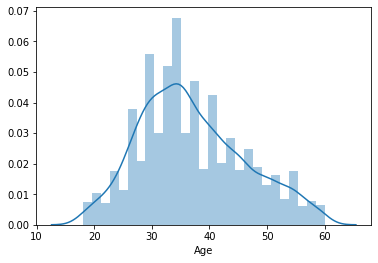

In [17]:
sns.distplot(df1['Age'])
plt.show()

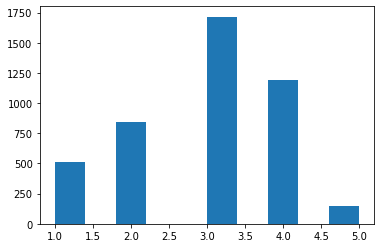

In [18]:
plt.hist(df1['Education'])
plt.show()

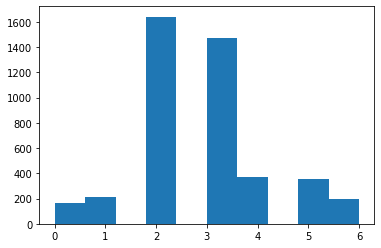

In [19]:
plt.hist(df1['TrainingTimesLastYear'])
plt.show()

# Kurtosis

## Finding out the Kurtosis

In [20]:
df_kurt = pd.DataFrame(df1.kurt(), columns = ['Kurtosis'])
df_kurt

,Kurtosis
Age,-0.405951
Attrition,1.397690
BusinessTravel,0.698371
Department,-0.393269
DistanceFromHome,-0.227045
Education,-0.560569
EducationField,-0.689242
Gender,-1.834052
MaritalStatus,-1.115231
JobLevel,0.395525


# Checking for outliers

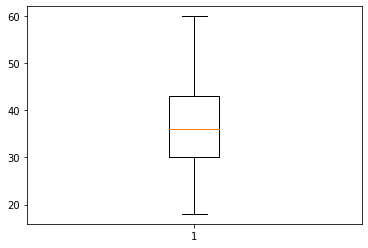

In [21]:
plt.boxplot(df['Age'])
plt.show()

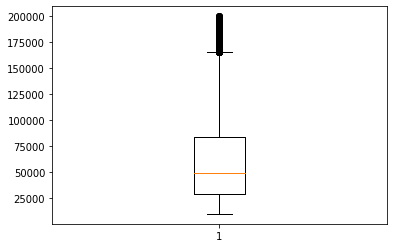

In [22]:
plt.boxplot(df['MonthlyIncome'])
plt.show()

# Performing Non Parametric Tests

## Mann Whitney Test

### Making a dataframe of continuous columns

In [24]:
cols_cont = df[['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [25]:
from scipy.stats import mannwhitneyu


### Making function to run mannwhitney test for a column against attrition

In [26]:
def mwtest(column):
    
    stats, p = mannwhitneyu(df_y[column], df_n[column])
    print(f"\tp value is {round(p, 3)}\n")

### Making a function to print all continuous columns vs attrition along with hypothesis and decision

In [28]:
def mwtest_all(colname):
    print(f"{colname} vs Attrition: \n")
    print(f"\tH0: There are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print(f"\tH1: There are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n")
    print("\tPerforming MannWhitneyU Test:")
    stats, p = mannwhitneyu(df_y[colname], df_n[colname])
    print(f"\tObtained p value is {round(p, 3)}\n")
    if p < 0.05:
        print(f"\tAs the P value of {round(p, 3)} is < 0.05, the H0 is rejected and H1 is accepted.")
        print(f"\tTherefore, there are significant differences in the {colname} between attrition (Y) and attirition (N)")
    else:
        print(f"\tAs the P value of {round(p, 3)} is > 0.05, the H0 is accepted and H1 is rejected.")
        print(f"\tTherefore, there are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n ----------- \n")

## Running the test

In [29]:
cols = list(cols_cont.columns)
for col in cols:
    mwtest_all(col)

Age vs Attrition: 

	H0: There are no significant differences in the Age between attrition (Y) and attirition (N)
	H1: There are significant differences in the Age between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.0

	As the P value of 0.0 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the Age between attrition (Y) and attirition (N)

 ----------- 

DistanceFromHome vs Attrition: 

	H0: There are no significant differences in the DistanceFromHome between attrition (Y) and attirition (N)
	H1: There are significant differences in the DistanceFromHome between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.463

	As the P value of 0.463 is > 0.05, the H0 is accepted and H1 is rejected.
	Therefore, there are no significant differences in the DistanceFromHome between attrition (Y) and attirition (N)

 ----------- 

MonthlyIncome vs Attrition: 

	H0: Ther

## Chisquare Test

In [30]:
from scipy.stats import chi2_contingency
df_chi = pd.read_csv('C:/Users/HP/general_data.csv')

### Making a function to run ChiSquare Test and print out the hypothesis and result

In [32]:
def chitest(column):
    print(f"ChiSquare Test to check for dependency between Attrition and {column}-\n\n")
    print(f"\tH0: There is no dependency between Attrition and {column}")
    print(f"\tH1: There is dependency between Attrition and {column}")
    
    chitable = pd.crosstab(df_chi[column], df_chi['Attrition'])
    print("\nChitbale:\n\n",chitable)
    stats, p, dof, expected = chi2_contingency(chitable)
    print(f"\n\tObtained p value is {round(p, 3)}")
    
    if p > 0.05:
        print(f"\n\tSince here p value {round(p,3)} is > 0.05 we accept the null hypothesis")
        print(f"\n\tTherefore, there is no dependency between Attrition and {column}\n\n----------\n")
    else:
        print(f"\n\tSince here p value {round(p,3)} is < 0.05 we reject the null hypothesis")
        print(f"\n\tTherefore, there is dependency between Attrition and {column}\n\n----------\n")

In [33]:
df_cat = df_chi[['Education', 'BusinessTravel', 'Gender', 'Department', 'EducationField', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel']].columns
for col in df_cat:
    chitest(col)

ChiSquare Test to check for dependency between Attrition and Education-


	H0: There is no dependency between Attrition and Education
	H1: There is dependency between Attrition and Education

Chitbale:

 Attrition    No  Yes
Education           
1           432   78
2           687  159
3          1449  267
4          1008  186
5           123   21

	Obtained p value is 0.228

	Since here p value 0.228 is > 0.05 we accept the null hypothesis

	Therefore, there is no dependency between Attrition and Education

----------

ChiSquare Test to check for dependency between Attrition and BusinessTravel-


	H0: There is no dependency between Attrition and BusinessTravel
	H1: There is dependency between Attrition and BusinessTravel

Chitbale:

 Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468

	Obtained p value is 0.0

	Since here p value 0.0 is < 0.05 we reject the null hypothesis

	Therefore, there

## Performing Parametric Test

### Separate T Test

In [34]:
from scipy.stats import ttest_ind

#### Making a function to perform separate t test and print hypothesis statements and decision


In [35]:
def separate_t(colname):
    print(f"{colname} vs Attrition: \n")
    print(f"\tH0: There are no significant differences in the {colname} between attrition (Y) and attirition (N)")
    print(f"\tH1: There are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n")
    print("\tPerforming MannWhitneyU Test:")
    stats, p = ttest_ind(df_y[colname], df_n[colname])
    print(f"\tObtained p value is {round(p, 3)}\n")
    if p < 0.05:
        print(f"\tAs the P value of {round(p, 3)} is < 0.05, the H0 is rejected and H1 is accepted.")
        print(f"\tTherefore, there are significant differences in the {colname} between attrition (Y) and attirition (N)")
    else:
        print(f"\tAs the P value of {round(p, 3)} is > 0.05, the H0 is accepted and H1 is rejected.")
        print(f"\tTherefore, there no are significant differences in the {colname} between attrition (Y) and attirition (N)")
    print("\n ----------- \n")

In [36]:
separate_t('Age')

Age vs Attrition: 

	H0: There are no significant differences in the Age between attrition (Y) and attirition (N)
	H1: There are significant differences in the Age between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.0

	As the P value of 0.0 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the Age between attrition (Y) and attirition (N)

 ----------- 



In [37]:
separate_t('TrainingTimesLastYear')

TrainingTimesLastYear vs Attrition: 

	H0: There are no significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)
	H1: There are significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)


	Performing MannWhitneyU Test:
	Obtained p value is 0.001

	As the P value of 0.001 is < 0.05, the H0 is rejected and H1 is accepted.
	Therefore, there are significant differences in the TrainingTimesLastYear between attrition (Y) and attirition (N)

 ----------- 



# Correlation Analysis

In [38]:
from scipy.stats import pearsonr

In [39]:
def corr_an (column):
    print(f"Correlation Analysis of Attrition vs {column}:\n")
    print(f"\tH0: There is no significant relation between Attrition and {column}")
    print(f"\tH1: There is significant relation between Attrition and {column}\n")
    corr_, p = pearsonr(df['Attrition'], df[column])
    corr_ = round(corr_, 3)
    p = round(corr_, 3)
    
    
    if p > 0.05:
        print(f"\n\tHere, the P value of {p} is > 0.05 so we are accepting H0 \n\tHence there is no significant correlation between Attrition and {column}")
    else:
        print(f"\n\tHere, the P value of {p} is < 0.05 so we are rejecting H0 \n\tHence there is significant correlation between Attrition and {column}") 
        if corr_ >= 0 and corr_ < 0.50:
            print(f"\tAs R = {corr_}, there is low positive correlation between Attrition and {column}")
        elif corr_ >= 0.50 and corr_ < 0.70:
            print(f"\tAs R = {corr_}, there is moderate positive correlation between Attrition and {column}")
        elif corr_ >= 0.70 and corr_ < 0.90:
            print(f"\tAs R = {corr_}, there is high positive correlation between Attrition and {column}")
        elif corr_ >= 0.90 and corr_ <= 0.1:
            print(f"\tAs R = {corr_}, there is very high positive correlation between Attrition and {column}")
        elif corr_ <= 0 and corr_ > -0.50:
            print(f"\tAs R = {corr_}, there is low negative correlation between Attrition and {column}")
        elif corr_ <= -0.50 and corr_ > -0.70:
            print(f"\tAs R = {corr_}, there is moderate negative correlation between Attrition and {column}")
        elif corr_ <= -0.70 and corr_ > 0.90:
            print(f"\tAs R = {corr_}, there is high negative correlation between Attrition and {column}")
        else:
            print(f"\tAs R = {corr_}, there is very high negative correlation between Attrition and {column}")
            
    print("\n----------\n")

In [40]:
df_cor = df.drop(columns = ['Attrition', 'EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'])
df_cor.columns
for col in df_cor.columns:
    corr_an(col)

Correlation Analysis of Attrition vs Age:

	H0: There is no significant relation between Attrition and Age
	H1: There is significant relation between Attrition and Age


	Here, the P value of -0.159 is < 0.05 so we are rejecting H0 
	Hence there is significant correlation between Attrition and Age
	As R = -0.159, there is low negative correlation between Attrition and Age

----------

Correlation Analysis of Attrition vs BusinessTravel:

	H0: There is no significant relation between Attrition and BusinessTravel
	H1: There is significant relation between Attrition and BusinessTravel


	Here, the P value of 0.0 is < 0.05 so we are rejecting H0 
	Hence there is significant correlation between Attrition and BusinessTravel
	As R = 0.0, there is low positive correlation between Attrition and BusinessTravel

----------

Correlation Analysis of Attrition vs Department:

	H0: There is no significant relation between Attrition and Department
	H1: There is significant relation between Attrition a

# Plots to visualise the data

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

## Jointplot for Age amongst Attrited and Non-Attrited Employees

This plot also shows a regression line along with the pearson coefficient annotated

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


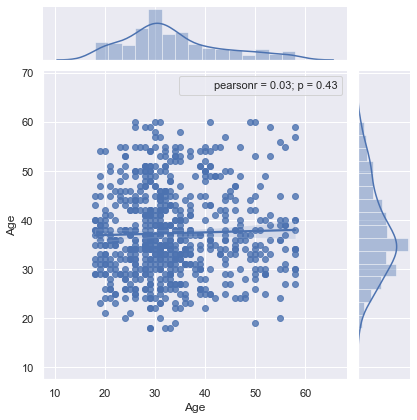

In [43]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(df_y['Age'].sample(700), df_n['Age'].sample(700),
             data = df, kind = "reg", color = "b").annotate(pearsonr)
plt.show()

## Heat Map to visualise correlation

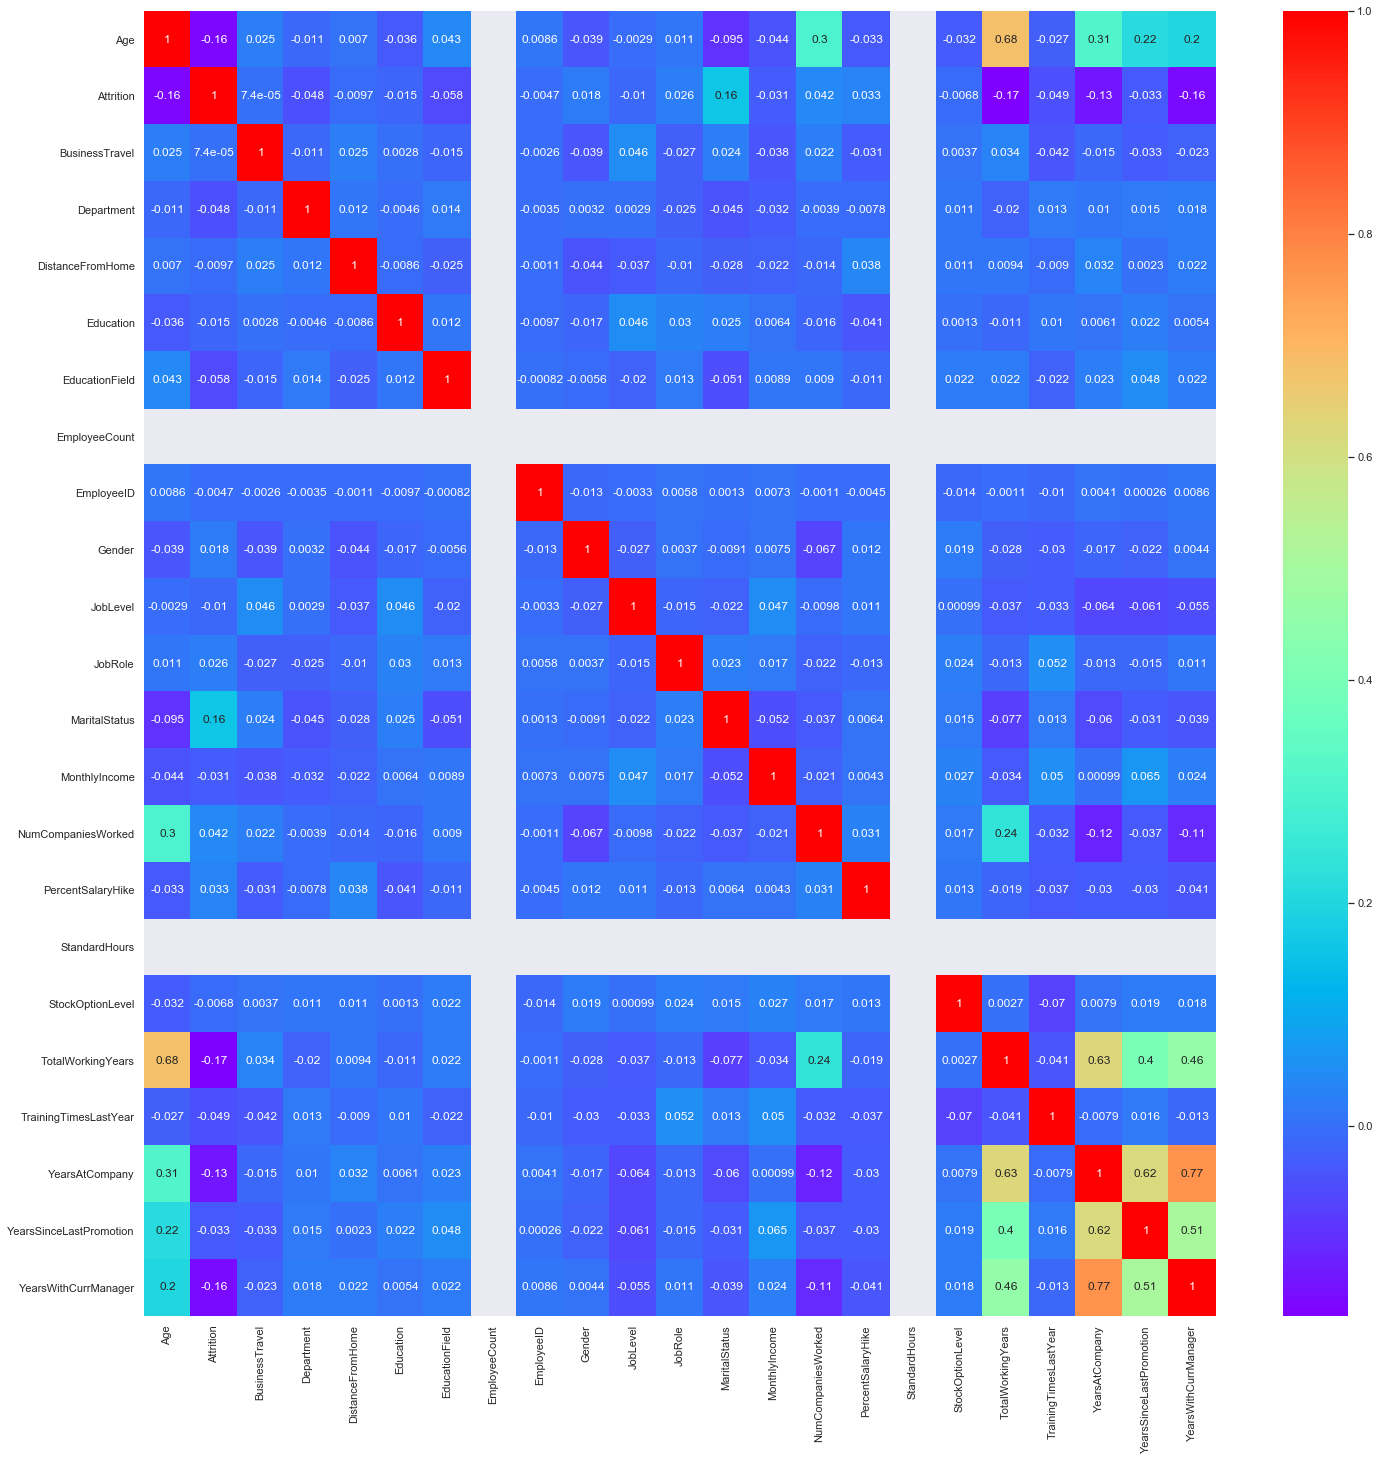

In [44]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)
plt.show()

Looking at the heatmap we can conclude that attrition shares significant correlation with total working years, years at the company and years with current manager.

## Countplots for Job Role, Department, Education Field and Business travel of the employees

### Job role Count

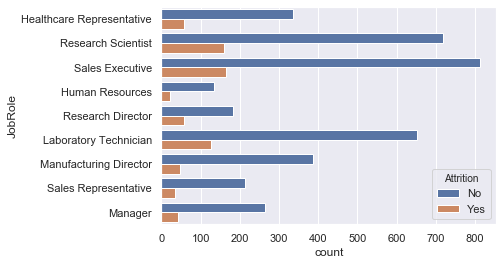

In [46]:
sns.countplot(y="JobRole", hue="Attrition", data=df_chi)
plt.show()

### Department Count

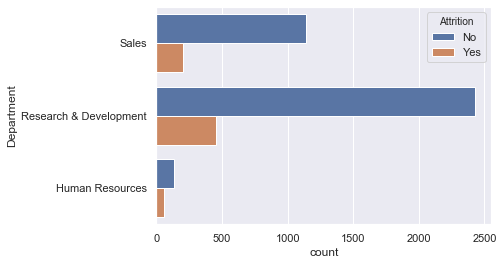

In [47]:
sns.countplot(y="Department", hue="Attrition", data=df_chi)
plt.show()

### Education Field Count 

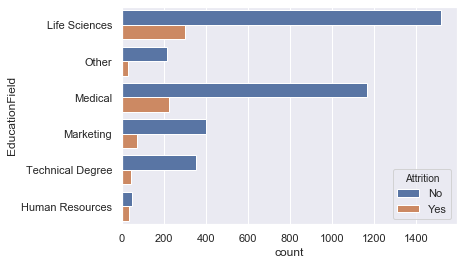

In [48]:
sns.countplot(y="EducationField", hue="Attrition", data=df_chi)
plt.show()

### Business Travel Count

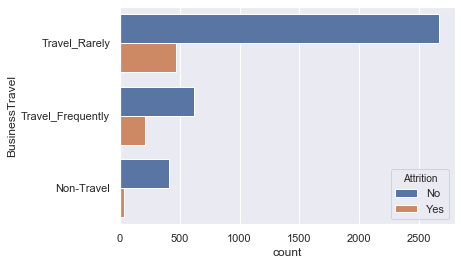

In [49]:
sns.countplot(y="BusinessTravel", hue="Attrition", data=df_chi)
plt.show()